# All the current cuts

In [1]:
import glob
import sys
sys.path.append("../../")
from parsers.RCparsers import *
from plots.ResponseCurvePlots import *
import json
import matplotlib.pyplot as plt
from analysis.ECUnbondedClassification.unbondedClassification import *

In [2]:
with open("../Helpers/subtypes.txt", 'r') as f:
    subtypes = f.read().split(',')
subtypes.sort()
for subtype in subtypes:
    print(subtype + ", ", end="")

R0H0, R0H1, R1H0, R1H1, R2H0, R3H0, R3H1, R3H2, R3H3, R4H0, R4H1, R5H0, R5H1, 

In [3]:
jsonPath = "../Helpers/jsonFiles/"
jsonFiles = [jsonPath + subtype + "data.json" for subtype in subtypes]
jsonDict = dict(zip(subtypes, jsonFiles))

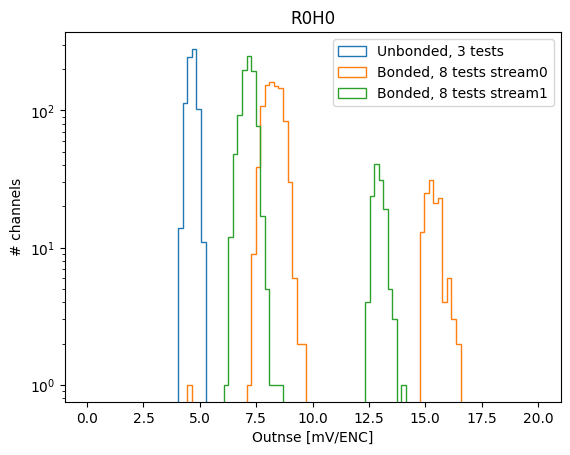

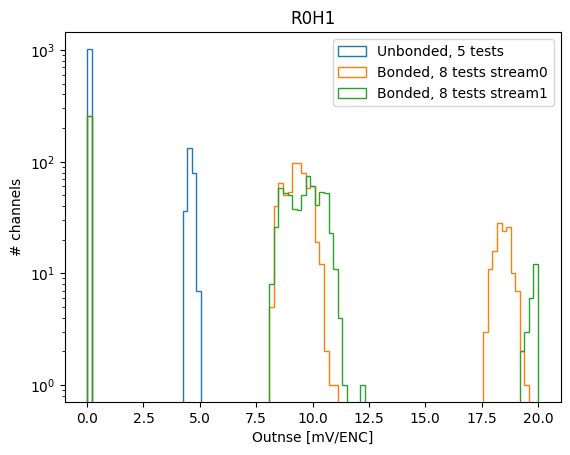

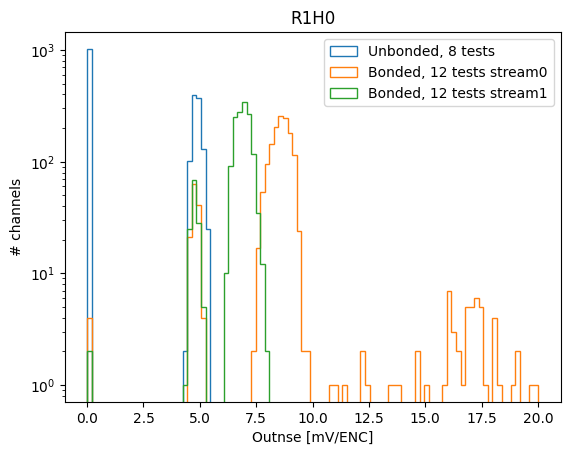

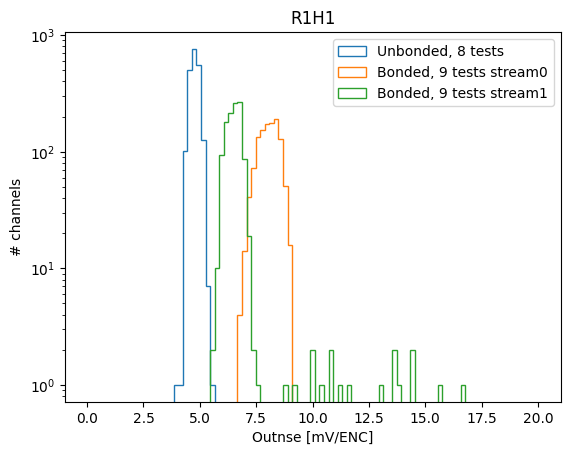

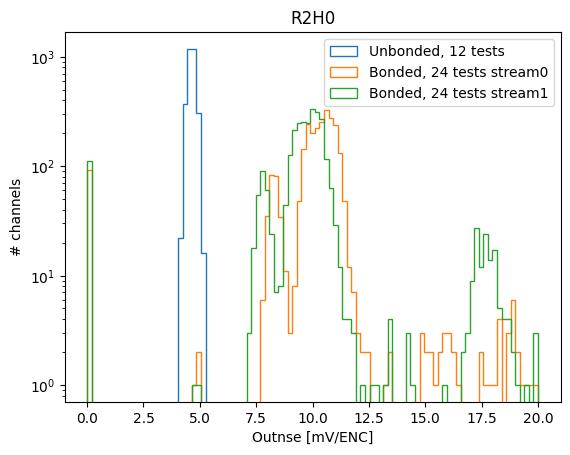

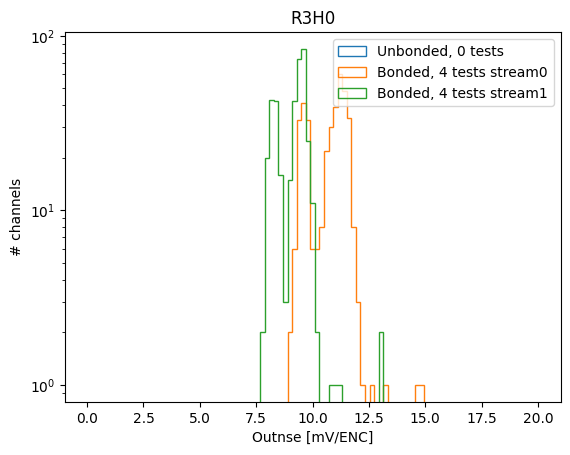

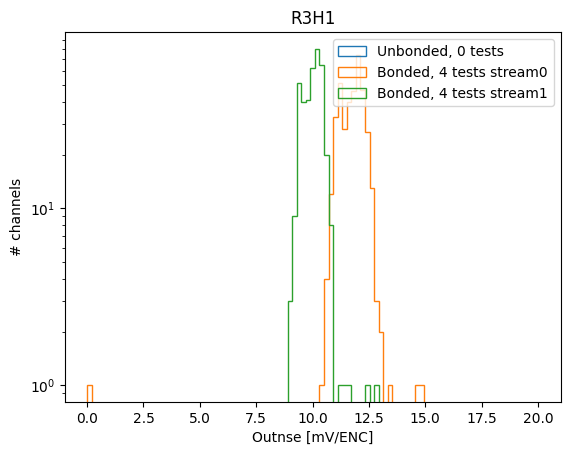

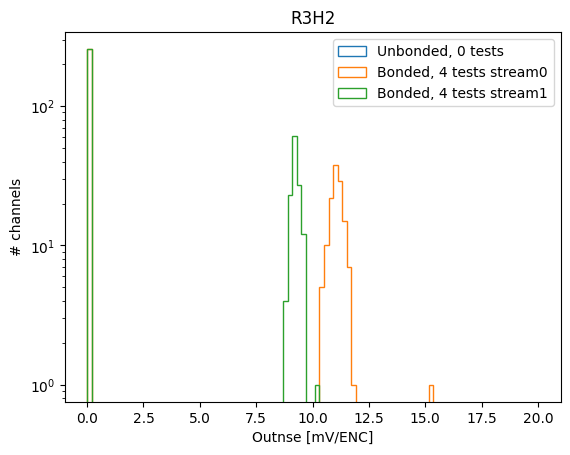

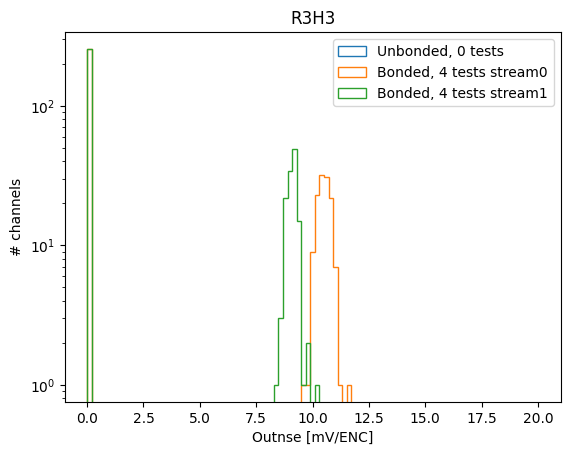

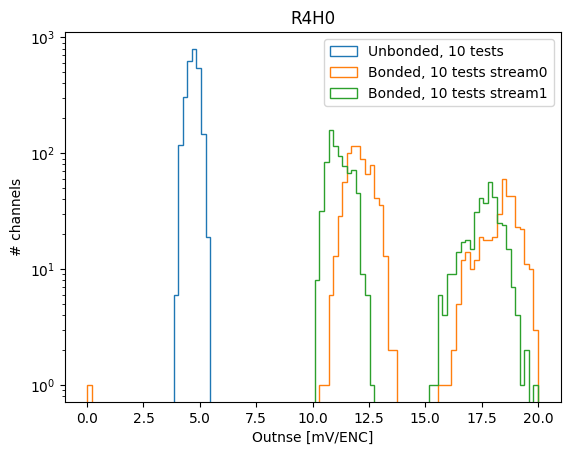

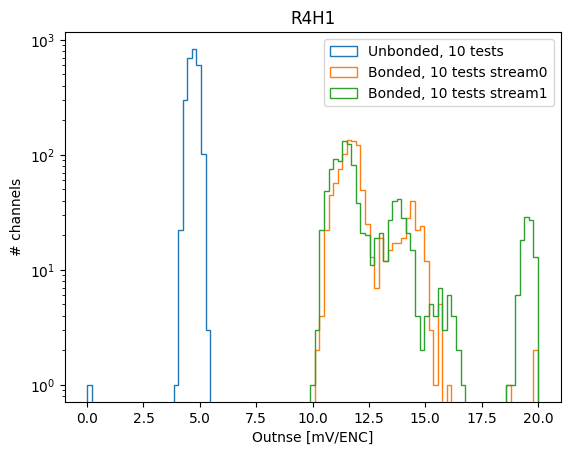

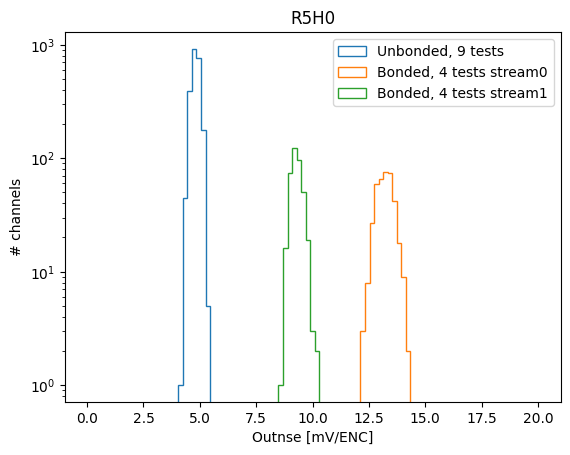

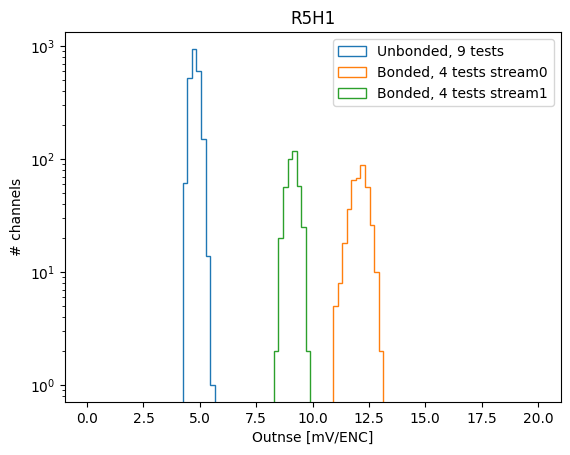

In [4]:
for subtype in subtypes:
    fig = unbondedClassification(jsonDict[subtype], verbose=False)
    fig.savefig("../../../images/unbondedClassification/" + subtype + 'unbndClsn.png')

# Gaussian fit of the R1H1s

In [5]:
with open(jsonDict['R1H1'], 'r') as f:
    ids = json.load(f)

In [6]:
hybrids = {'unbonded' : [],
           'bonded' : []}
outnses = {'unbonded' : [],
           'bonded' : []}
for bondStatus in hybrids:
    print(bondStatus)
    for idNumber in ids[bondStatus + "_itkdb_testids"]:
        filename = "../../data/" + idNumber + ".json"
        hybrid = parseRC(filename, verbose=False)
        hybrids[bondStatus].append(hybrid)
        channelDict = {'unbonded' : hybrid.channels,
                       'bonded' : hybrid.stream1}
        outnses[bondStatus].extend(channel.outnse for channel in channelDict[bondStatus])
    print()

unbonded

bonded



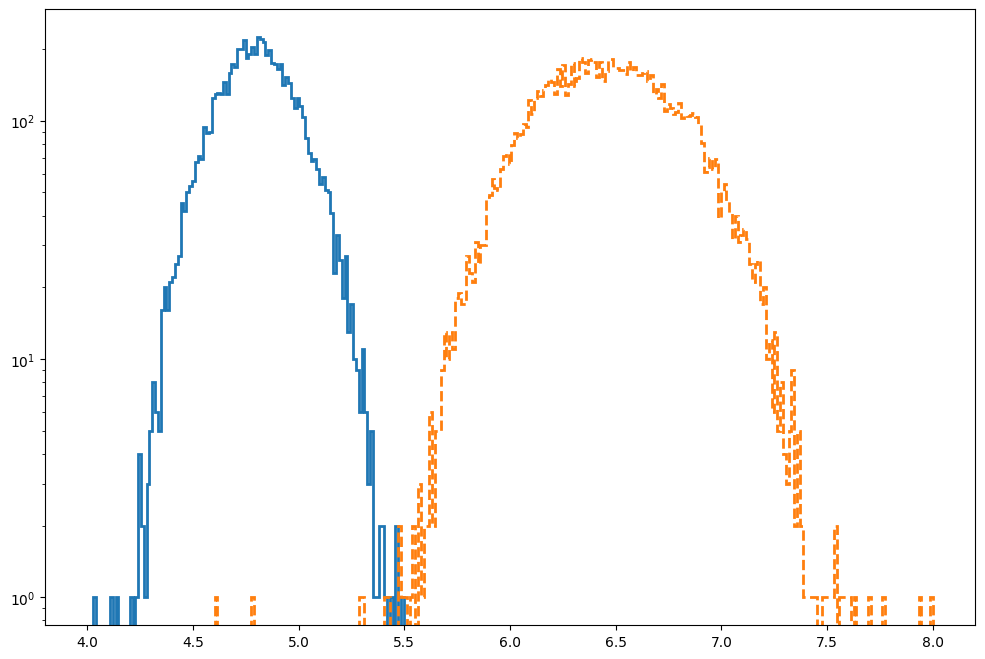

In [7]:
fig = plt.figure(figsize=(12, 8))
binMin = 4
binMax = 8
nBins = 300
bins = np.linspace(binMin, binMax, nBins)
lineStyles = {'unbonded' : '-',
              'bonded' : '--'}
binCounts = {}
binEdges = {}
binCenters = {}
for bondStatus in outnses:
    binCounts[bondStatus], binEdges[bondStatus], _ = plt.hist(outnses[bondStatus], bins=bins, histtype='step', linewidth=2, linestyle=lineStyles[bondStatus])
    binCenters[bondStatus] = [(binEdges[bondStatus][i] + binEdges[bondStatus][i+1]) / 2 for i in range(len(binEdges[bondStatus])-1)]
plt.yscale('log')

In [8]:
from scipy.optimize import curve_fit

In [9]:
def Gauss(x, a, x0, sigma):
    return a * np.exp (-(x - x0)**2 / (2 * sigma**2))

mean = {}
sigma = {}
popt = {}
pcov = {}
for bondStatus in outnses:
    mean[bondStatus] = np.mean(outnses[bondStatus])
    sigma[bondStatus] = np.std(outnses[bondStatus])
    popt[bondStatus], pcov[bondStatus] = curve_fit(Gauss, binCenters[bondStatus], binCounts[bondStatus],
                                            p0=[max(binCounts[bondStatus]), mean[bondStatus], sigma[bondStatus]])





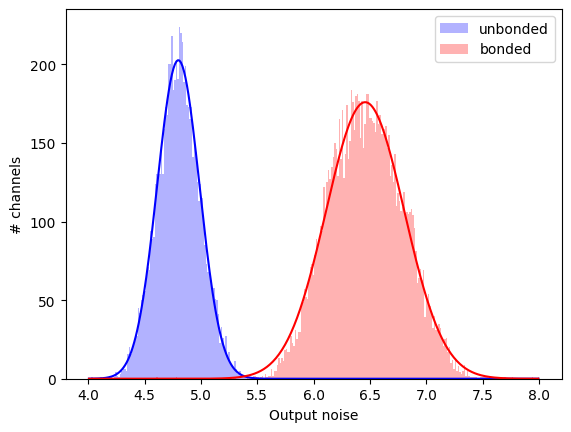

In [10]:
fig = plt.figure()
colors = {'unbonded' : 'b', 'bonded' : 'r'}
for bondStatus in outnses:
    plt.hist(outnses[bondStatus], bins=bins, color=colors[bondStatus], alpha=0.3, label=bondStatus)
    plt.plot(binCenters[bondStatus], Gauss(binCenters[bondStatus], *popt[bondStatus]), '-', color=colors[bondStatus])
#plt.xlim(5.2, 6)
#plt.ylim(0, 50)
plt.ylabel('# channels')
plt.xlabel('Output noise')
plt.legend()

In [12]:
import scipy.integrate as integrate

In [13]:
def UnbondedGauss(x):
    return Gauss(x, *popt['unbonded'])
def BondedGauss(x):
    return Gauss(x, *popt['bonded'])

In [14]:
cut = 5.5
under, _ = integrate.quad(UnbondedGauss, 0, cut)
over, _ = integrate.quad(UnbondedGauss, cut, 10)

In [15]:
cuts = np.linspace(5.3, 5.8, 30)
misRate = {'unbonded' : [],
           'bonded' : []}
functions = {'unbonded' : UnbondedGauss,
             'bonded' : BondedGauss}
for bondStatus in outnses:
    for cut in cuts:
        under, _ = integrate.quad(functions[bondStatus], 0, cut)
        over, _ = integrate.quad(functions[bondStatus], cut, 10)
        misRate[bondStatus].append(100 * min(under, over) / (over + under))

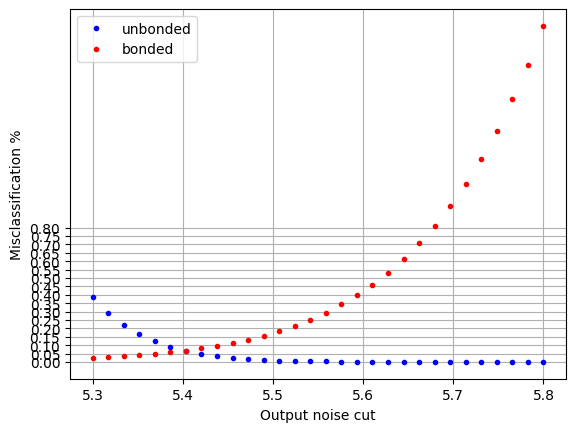

In [16]:
plt.plot(cuts, misRate['unbonded'], '.', color=colors['unbonded'], label='unbonded')
plt.plot(cuts, misRate['bonded'], '.', color=colors['bonded'], label='bonded')
plt.ylabel('Misclassification %')
plt.xlabel('Output noise cut')
plt.yticks([y / 20 for y in range(17)])
plt.grid(visible=True)
plt.legend()

In [11]:
from plotMisclassificationRate import plotMisclassificationRate

In [12]:
from Helpers.getECSubtypes import getECSubtypes
subtypes = getECSubtypes()

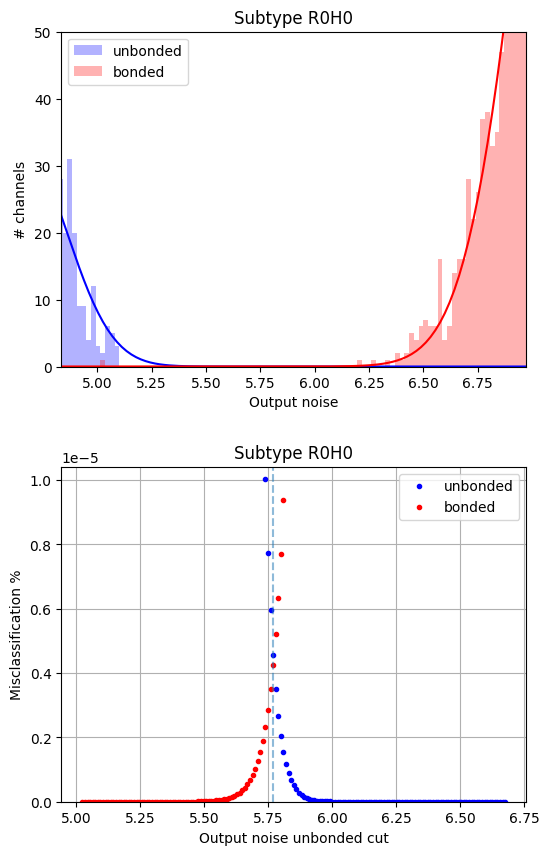

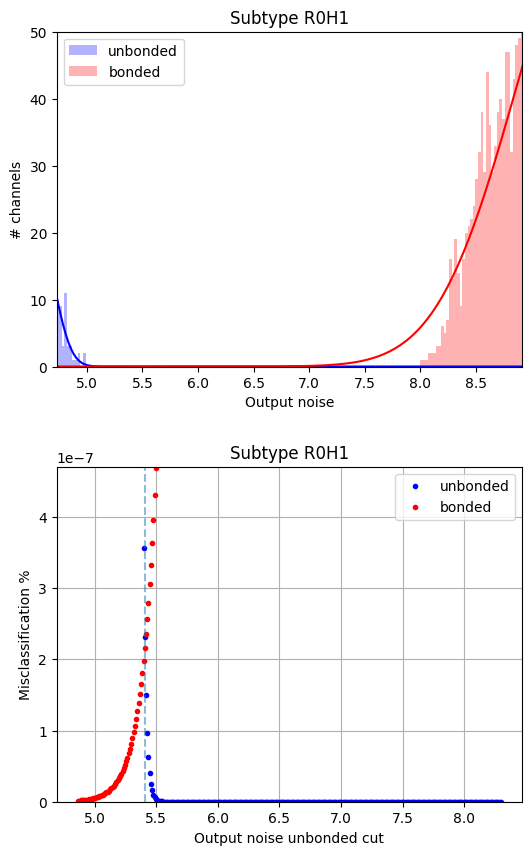

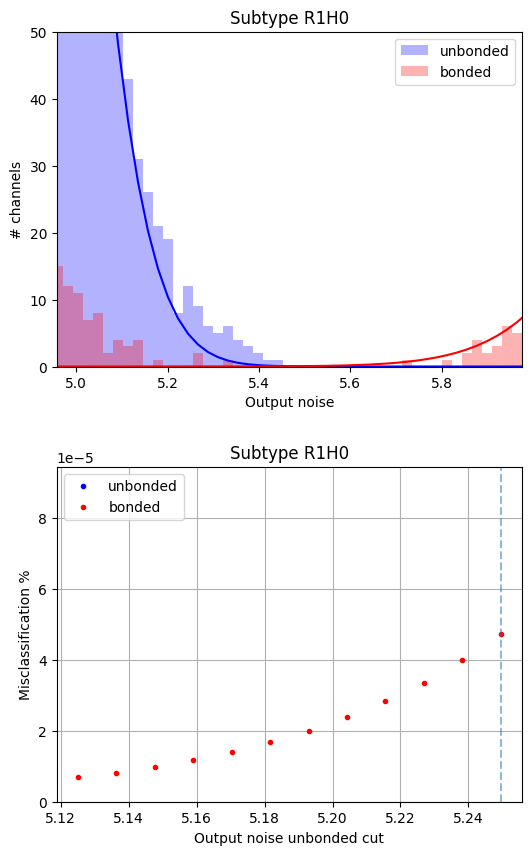

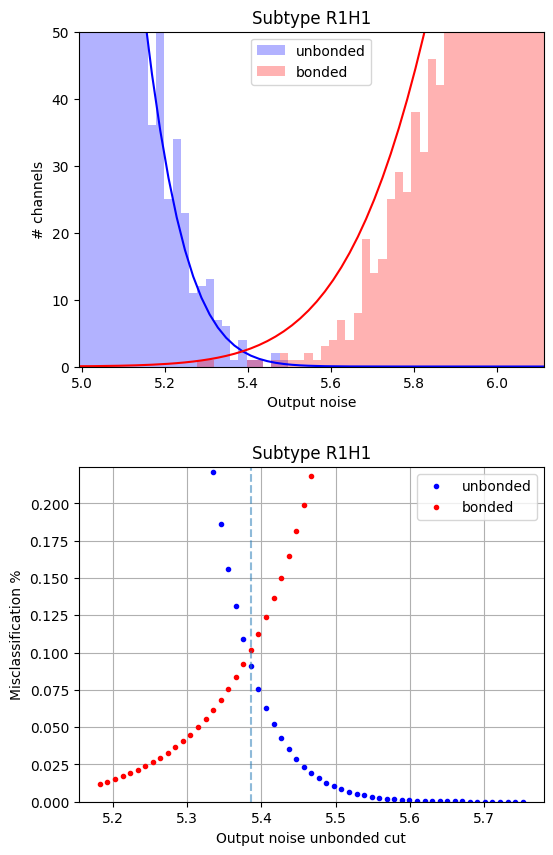

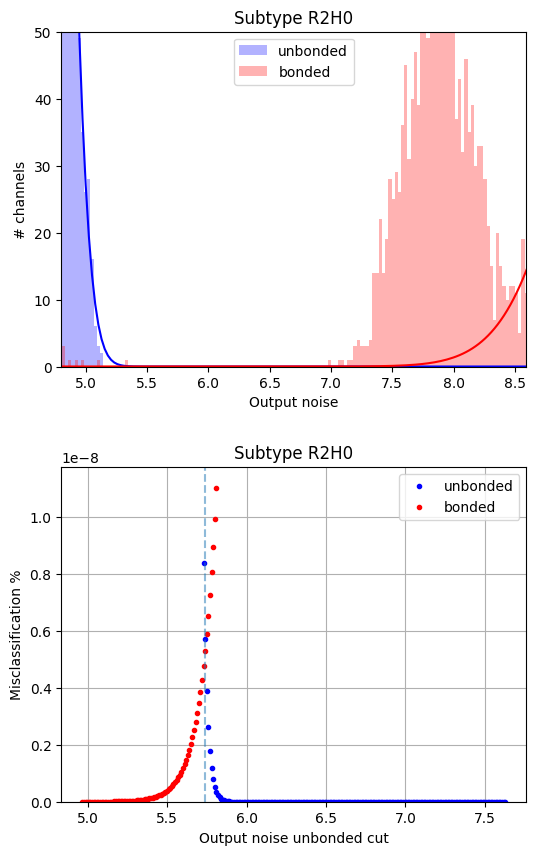

No unbonded hybrids for subtype R3H0. Cannot run misclassification plot.
No unbonded hybrids for subtype R3H1. Cannot run misclassification plot.
No unbonded hybrids for subtype R3H2. Cannot run misclassification plot.
No unbonded hybrids for subtype R3H3. Cannot run misclassification plot.


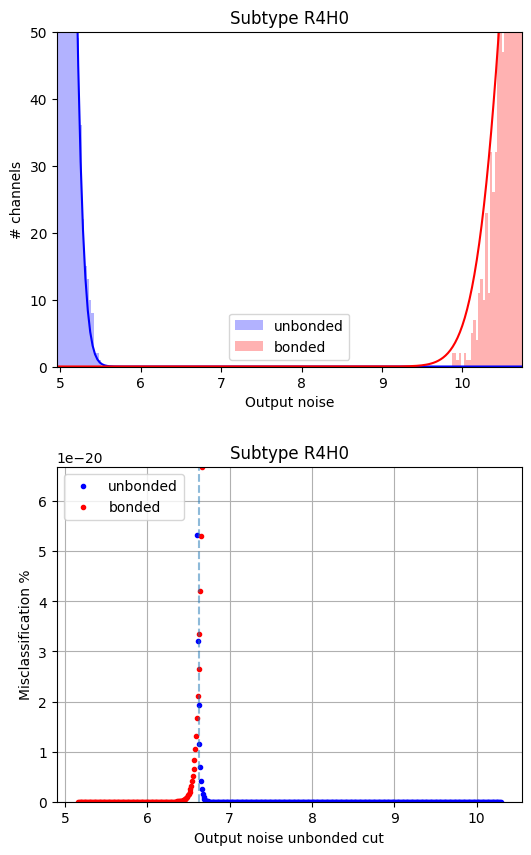

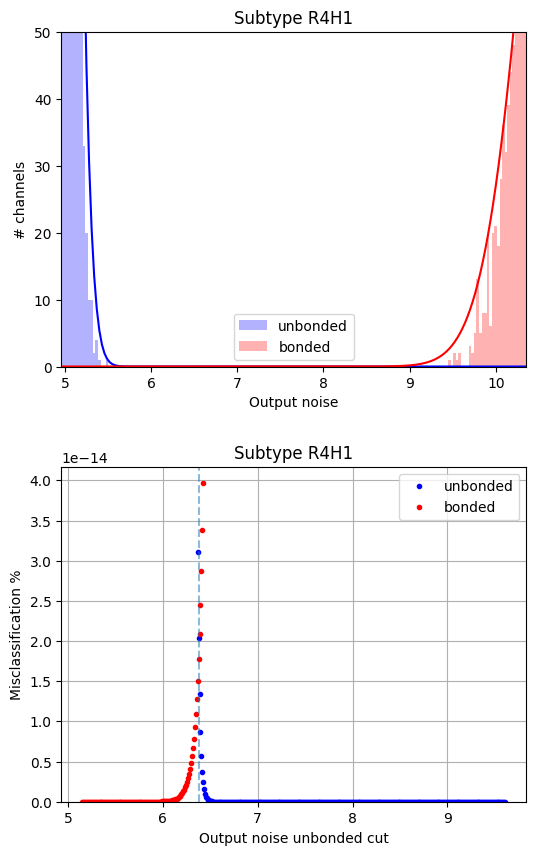

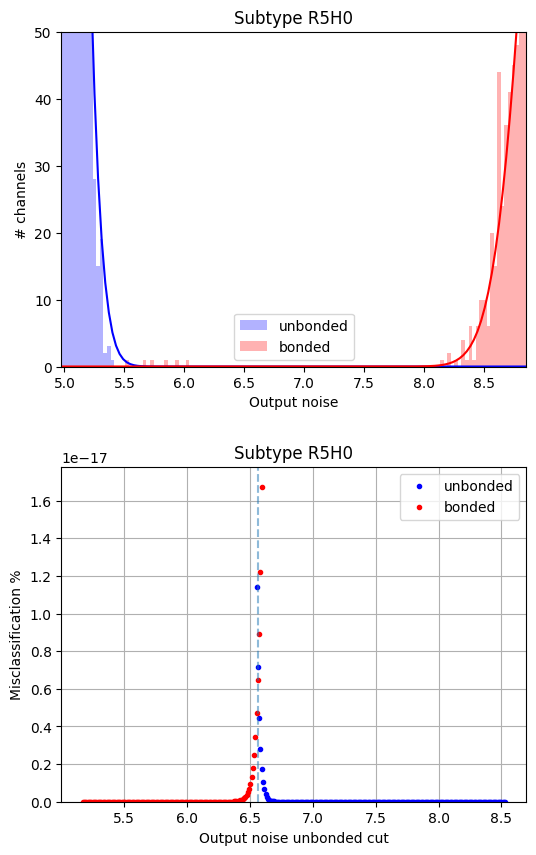

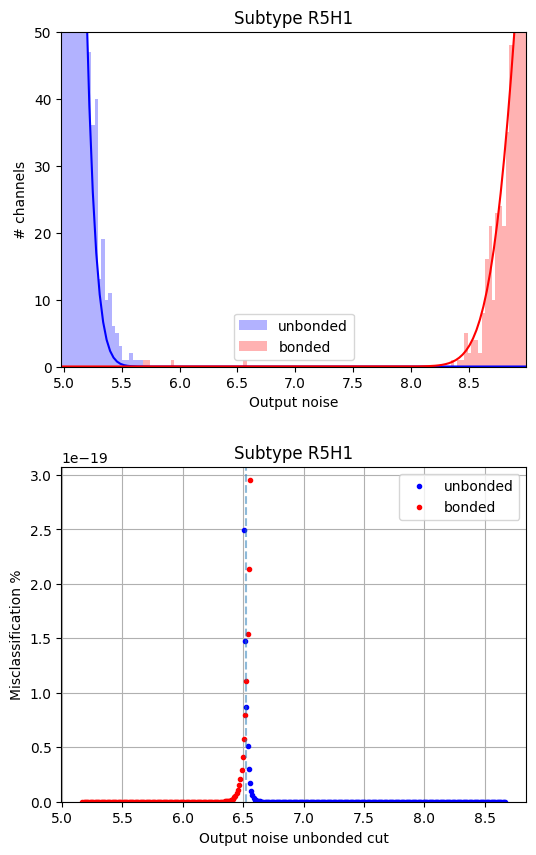

In [13]:
for subtype in subtypes:
    plotMisclassificationRate(subtype, verbose=False)